# Numerical ODEs Course Notes Examples

### Theory Questions

(page 17) : Why do we know that $\tau$ is between $t$ and $t_0$? <br>
    -   It comes from the Taylor series theorem with remainder

(page 28) Intuition for chain rule for 2-var functions

Hi Fred was here (git testing).

### Setup

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci

### Helper Functions

In [2]:
def plot_slope_field(f, x_min = -2, x_max = 2, y_min = -2, y_max = 2, x_spacing = 0.25, y_spacing = -1):
    if(y_spacing < 0):
        y_spacing = x_spacing

    fig, ax = plt.subplots()

    X, Y = np.meshgrid(np.arange(x_min, x_max, x_spacing), np.arange(y_min, y_max, y_spacing))
    
    dY_dX = f(X, Y) 
    
    ax.quiver(X, Y, 1, dY_dX)

    return fig, ax

def plot_slope_field_system(f, param, x_min = -2, x_max = 2, y_min = -2, y_max = 2, x_spacing = 0.25, y_spacing = -1):
    if(y_spacing < 0):
        y_spacing = x_spacing

    fig, ax = plt.subplots()

    X, Y = np.meshgrid(np.arange(x_min, x_max, x_spacing), np.arange(y_min, y_max, y_spacing))
    
    dY_dX = f(0, [X, Y], param) 
    
    ax.quiver(X, Y, dY_dX[0], dY_dX[1])

    return fig, ax

## Chapter 1 | Preliminaries

Here we give some function definitions from equations in chapter 1

In [3]:
def dy_dt_twisty(t, y, param = 0):
    '''
    Twisty Slope Field (1.19) 
    '''
    return np.array([t * np.cos(y) - y * np.sin(t)])

In [4]:
def dy_dt_pred_prey(t, y, param):
    '''
    y should have components:
    y[0] : aphids
    y[1] : ladybugs

    returns derivatives of each component of y.
    '''
    dy0_dt = param * y[0] * (1 - y[1])
    dy1_dt = y[1] * (y[0] - 1)

    return np.array([dy0_dt, dy1_dt])

## Chapter 2 | Euler's Method and Taylor Series Methods

In [5]:
def solve_Euler(f, times, y_0, param = 0):
    '''
    Solves IVP using Euler method

    Input f : f(t, y) = dy/dy evaluated at (t, y).
    '''

    y_0 = np.array(y_0)

    no_of_times = times.size
    no_of_eqns = y_0.size
    Y = np.zeros((no_of_times, no_of_eqns))    
    Y[0] = y_0   

    for i in range(no_of_times - 1):
        h = times[i + 1] - times[i]
        Y[i + 1] = Y[i] + h * f(times[i], Y[i], param)
        
    return Y

Below is a plot of the approximate solution to the IVP involving the twisty slope field (1.19).

C:\Users\freds\AppData\Local\Temp\ipykernel_14064\2856862792.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


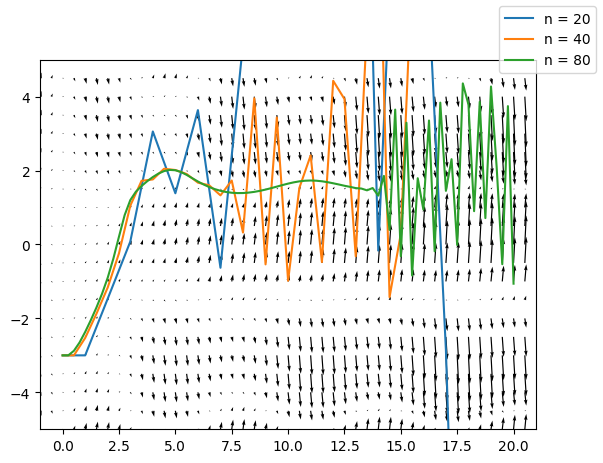

In [6]:
t_0, t_max = 0, 20
y_0 = np.array([2])

fig, ax = plot_slope_field(dy_dt_twisty, t_0 - 1, t_max + 1, -5, 5, 0.5)

N = [20, 40, 80]

for n in N:
    T = np.linspace(t_0, t_max, n + 1)

    sol = solve_Euler(dy_dt_twisty, T, -3)

    ax.plot(T, sol, label = "n = " + str(n))

ax.set_xlim(left = t_0 - 1, right = t_max + 1)
ax.set_ylim(bottom = -5, top = 5)
fig.legend()

fig.show()

Below is a plot of the lotka-volterra predator-prey model of aphids and ladybugs (1.6)

C:\Users\freds\AppData\Local\Temp\ipykernel_14064\2473912693.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


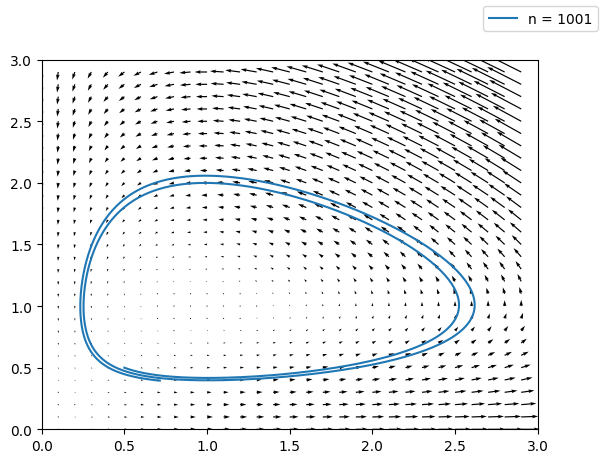

In [7]:
y_0 = np.array([0.5, 0.5])
t_0, t_max = 0, 10

fig, ax = plot_slope_field_system(dy_dt_pred_prey, 2, 0, 3, 0, 3, 0.1)

N = [1001]

for n in N:
    T = np.linspace(t_0, t_max, n + 1)

    sol = solve_Euler(dy_dt_pred_prey, T, y_0, param= 2)

    ax.plot(sol[:,0], sol[:,1], label = "n = " + str(n))

ax.set_xlim(left = 0, right = 3)
ax.set_ylim(bottom = 0, top = 3)
fig.legend()

fig.show()



### Exploring Second Order Taylor Series Methods
We look to apply a 2nd order Taylor series method to the logitstic differentiation equation (with $r = 1$) as is done in the notes. 

The logistic differential equation is $y'= ry(1-y)$. With $r = 1$ we have $y' = y(1-y) = y - y^2$. 

What is the (second order) Taylor series method? Recall that

$$
y(t_0 + h) = y(t_0) + y'(t_0)h + \frac{1}{2}y''(t_0)h^2 + \dots
$$

where we assert that as $h \rightarrow 0$, higher powers of this series expansion will become neglible. With y' = f(t, y) we have by partial differentiation 
$$
y'' = \frac{\mathrm{d}(f(t, y))}{\mathrm{d}t} = f_t + f_y\cdot y' = f_t + f_y\cdot f.
$$

So the second order Taylor method takes the form 

$$
y_{n+1} \approx y_n + hf(t_n, y_n) + \frac{1}{2}h^2(f_t(t_n, y_n) + f_y(t_n, y_n)\cdot f(t_n, y_n)).
$$

In the case of this particular ODE (logistic differential equation) we have
$$
f(t, y) = y - y^2 \implies f_t = 0, f_y = 1-2y
$$

and thus we the Taylor series method is

$$
y_{n+1} \approx y_n + h(y_n - y_n^2) + \frac{1}{2}h^2(1-2y_n)(y_n - y_n^2).
$$

We code this method using $y(0) = 0.2$, a stepsize $h = 0.2$ and a total of $N = 30$ steps.

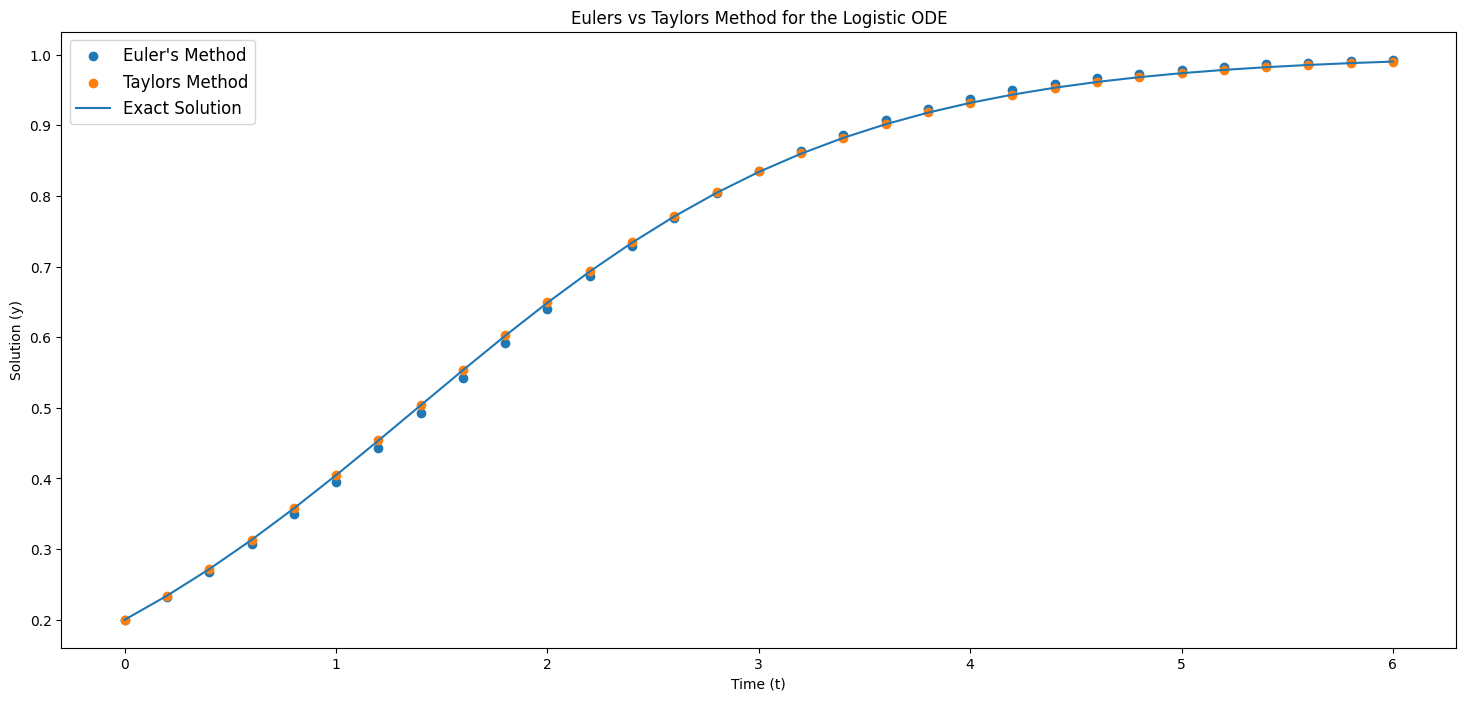

In [6]:
def LogisticODE_TaylorsVersion(y, h):
    # returns the next y approximation using the formula above
    return y + h*(y - y**2) + (h**2 / 2)*(1 - 2*y)*(y - y**2) 

def LogisticODE_EulersMethod(y, h):
    # returns the next y approximation using euler
    return y + h*(y - y**2)

x_0, y_0, h = 0, 0.2, 0.2
N = 30

x_values = np.arange(0, (h * (N + 1)), h)
y_euler = [y_0 if i == 0 else 0 for i in range (N + 1)]
y_taylor = [y_0 if i == 0 else 0 for i in range (N + 1)]
for i in range(N):
    # does not depend on "x" (i.e t)
    cur_euler_y = y_euler[i]
    next_euler_y = LogisticODE_EulersMethod(cur_euler_y, h)

    cur_taylor_y = y_taylor[i]
    next_taylor_y = LogisticODE_TaylorsVersion(cur_taylor_y, h)

    y_euler[i + 1] = next_euler_y
    y_taylor[i + 1] = next_taylor_y

fig, ax = plt.subplots(1, 1, figsize = (18, 8))
ax.scatter(x_values, y_euler, label = "Euler's Method")
ax.scatter(x_values, y_taylor, label = "Taylors Method")
ax.set_xlabel("Time (t)")
ax.set_ylabel("Solution (y)")
ax.set_title("Eulers vs Taylors Method for the Logistic ODE")

# can we solve the exact solution too?
def logistic_ode(y, t):
    return y*(1 - y)

# scipy.integrate.odeint(func(y, t), y0, t)
exact_sol = sci.integrate.odeint(logistic_ode, y_0, x_values)
ax.plot(x_values, exact_sol, markersize = '1', label = "Exact Solution")
ax.legend = plt.legend(loc = "best", fontsize = "large")

plt.show()

Just as the notes suggest, we see no immediate difference between the exact solution and either numerical. But by limiting our $x$ (t) axis towards the end of the solution, we see; 

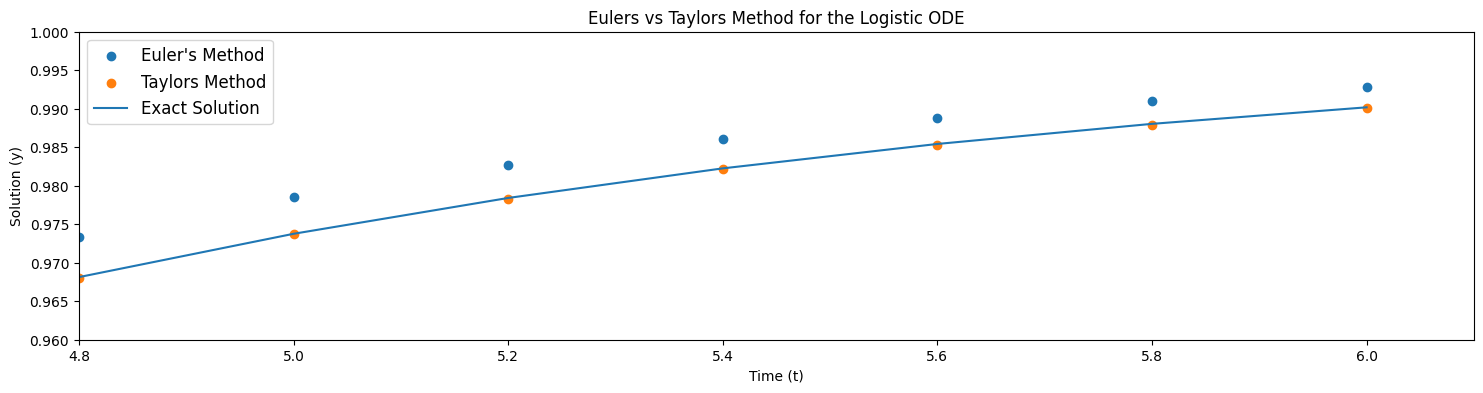

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (18, 4))
ax.set_xlim(4.8, 6.1)
ax.set_ylim(0.96, 1)
ax.scatter(x_values, y_euler, label = "Euler's Method")
ax.scatter(x_values, y_taylor, label = "Taylors Method")
ax.set_xlabel("Time (t)")
ax.set_ylabel("Solution (y)")
ax.set_title("Eulers vs Taylors Method for the Logistic ODE")

# can we solve the exact solution too?
def logistic_ode(y, t):
    return y*(1 - y)

# scipy.integrate.odeint(func(y, t), y0, t)
exact_sol = sci.integrate.odeint(logistic_ode, y_0, x_values)
ax.plot(x_values, exact_sol, markersize = '1', label = "Exact Solution")
ax.legend = plt.legend(loc = "best", fontsize = "large")

plt.show()